In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir('input'))

# Any results you write to the current directory are saved as output.

['store.csv', 'test.csv', 'train.csv']


In [2]:
store = pd.read_csv('input/store.csv')
train = pd.read_csv('input/train.csv',parse_dates=[2])
test = pd.read_csv('input/test.csv',parse_dates=[3])

C:\Users\Christian Karg\AppData\Local\Temp\ipykernel_23816\2831778153.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('input/train.csv',parse_dates=[2])


In [3]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [4]:
# check store nan rows
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [5]:
store.PromoInterval.value_counts()

Jan,Apr,Jul,Oct     335
Feb,May,Aug,Nov     130
Mar,Jun,Sept,Dec    106
Name: PromoInterval, dtype: int64

In [6]:
# fillna in store with 0 has better result than median()
# Aufbereiten der daten
store.fillna(0, inplace=True)

In [7]:
train.head().append(train.tail())

C:\Users\Christian Karg\AppData\Local\Temp\ipykernel_23816\925752541.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train.head().append(train.tail())


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [8]:
train.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [9]:
train.Open.value_counts()

1    844392
0    172817
Name: Open, dtype: int64

In [10]:
np.sum([train['Sales'] == 0])

172871

Text(0.5, 1.0, 'Store 10 Sales Distribution')

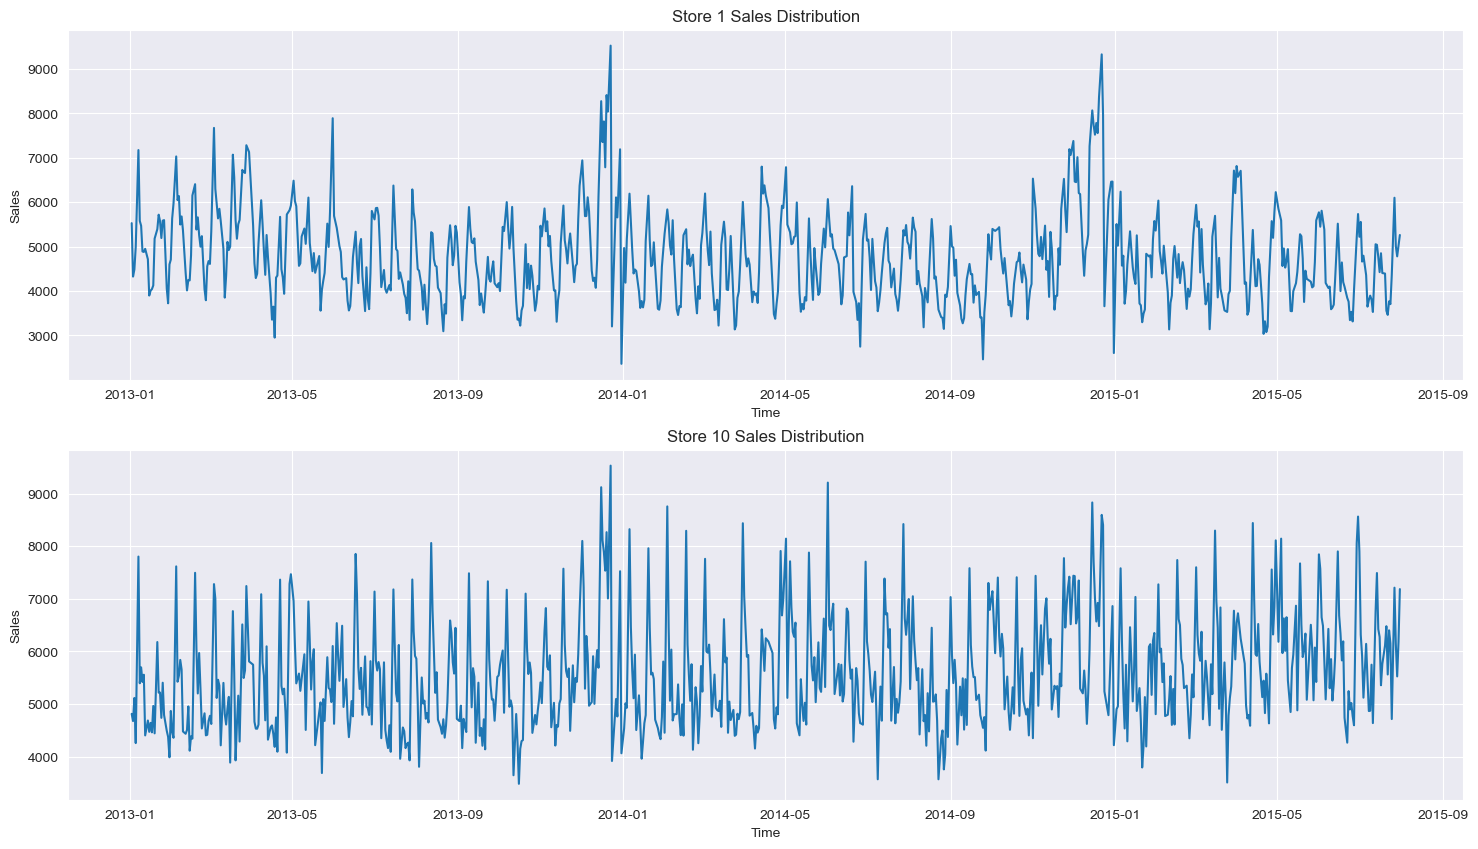

In [11]:
# draw store 1 and store 10 sales distribution plot
import matplotlib.pyplot as plt
store_1 = train.loc[(train["Store"]==1)&(train['Sales']>0), ['Date',"Sales"]]
store_10 = train.loc[(train["Store"]==10)&(train['Sales']>0), ['Date',"Sales"]]
f = plt.figure(figsize=(18,10))
ax1 = f.add_subplot(211)
ax1.plot(store_1['Date'], store_1['Sales'], '-')
ax1.set_xlabel('Time')
ax1.set_ylabel('Sales')
ax1.set_title('Store 1 Sales Distribution')

ax2 = f.add_subplot(212)
ax2.plot(store_10['Date'], store_10['Sales'], '-')
ax2.set_xlabel('Time')
ax2.set_ylabel('Sales')
ax2.set_title('Store 10 Sales Distribution')

In [12]:
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [13]:
test.isnull().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

Text(0.5, 1.0, 'Store Daily Open Countplot')

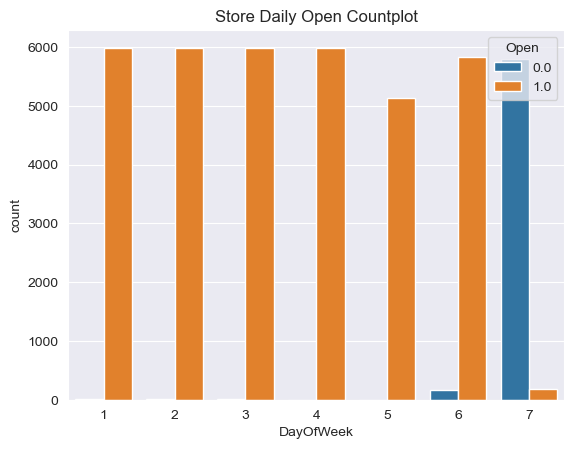

In [14]:
# check stores open distribution on days of week
import seaborn as sns
sns.countplot(x = 'DayOfWeek', hue = 'Open', data = test)
plt.title('Store Daily Open Countplot')

In [15]:
# check missing values in test open column
test[test.Open.isnull()]

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
479,480,622,4,2015-09-17,NaN,1,0,0
1335,1336,622,3,2015-09-16,NaN,1,0,0
2191,2192,622,2,2015-09-15,NaN,1,0,0
3047,3048,622,1,2015-09-14,NaN,1,0,0
4759,4760,622,6,2015-09-12,NaN,0,0,0
5615,5616,622,5,2015-09-11,NaN,0,0,0
6471,6472,622,4,2015-09-10,NaN,0,0,0
7327,7328,622,3,2015-09-09,NaN,0,0,0
8183,8184,622,2,2015-09-08,NaN,0,0,0
9039,9040,622,1,2015-09-07,NaN,0,0,0


In [16]:
# fill missing values in test with 1
# Aufbereiten der Daten
test.fillna(value = 1, inplace = True)

In [17]:
# merge data with store
# Alles in eine Tabelle
train = pd.merge(train, store, on='Store')
test = pd.merge(test, store, on='Store')

# split the last 6 weeks data as hold-out set (idea from Gert https://www.kaggle.com/c/rossmann-store-sales/discussion/18024)
train = train.sort_values(['Date'],ascending = False)
train_total = train.copy()

split_index = 6*7*1115
valid = train[:split_index] 
train = train[split_index:]

# only use data of Sales>0 and Open is 1
valid = valid[(valid.Open != 0)&(valid.Sales >0)]
train = train[(train.Open != 0)&(train.Sales >0)]
train_total = train_total[(train_total.Open != 0)&(train_total.Sales >0)]


In [18]:
# datensatz ohne letzte 6 Wochem
train.head().append(train.tail())

C:\Users\Christian Karg\AppData\Local\Temp\ipykernel_23816\1314495008.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train.head().append(train.tail())


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
284584,314,5,2015-06-19,5032,562,1,1,0,0,a,a,3560.0,10.0,2001.0,1,31.0,2013.0,"Feb,May,Aug,Nov"
417104,458,5,2015-06-19,7362,688,1,1,0,0,c,a,3390.0,0.0,0.0,0,0.0,0.0,0
875290,961,5,2015-06-19,7764,768,1,1,0,0,d,c,9430.0,0.0,0.0,0,0.0,0.0,0
119580,132,5,2015-06-19,7964,692,1,1,0,0,d,c,1040.0,0.0,0.0,1,27.0,2012.0,"Jan,Apr,Jul,Oct"
807974,887,5,2015-06-19,7776,632,1,1,0,0,d,a,19700.0,0.0,0.0,1,37.0,2009.0,"Jan,Apr,Jul,Oct"
864127,948,2,2013-01-01,4491,1039,1,0,a,1,b,b,1430.0,0.0,0.0,0,0.0,0.0,0
321485,353,2,2013-01-01,3139,820,1,0,a,1,b,b,900.0,0.0,0.0,1,14.0,2013.0,"Feb,May,Aug,Nov"
249459,274,2,2013-01-01,3102,729,1,0,a,1,b,b,3640.0,0.0,0.0,1,10.0,2013.0,"Jan,Apr,Jul,Oct"
235513,259,2,2013-01-01,6851,1444,1,0,a,1,b,b,210.0,0.0,0.0,0,0.0,0.0,0
238339,262,2,2013-01-01,17267,2875,1,0,a,1,b,a,1180.0,5.0,2013.0,0,0.0,0.0,0


In [19]:
# letzte 6 Wochen
valid.head().append(train.tail())

C:\Users\Christian Karg\AppData\Local\Temp\ipykernel_23816\2766379847.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  valid.head().append(train.tail())


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
679364,747,5,2015-07-31,10708,826,1,1,0,1,c,c,45740.0,8.0,2008.0,0,0.0,0.0,0
702362,772,5,2015-07-31,5224,635,1,1,0,1,d,c,1850.0,0.0,0.0,0,0.0,0.0,0
683890,752,5,2015-07-31,7763,565,1,1,0,1,a,a,970.0,3.0,2013.0,1,31.0,2013.0,"Feb,May,Aug,Nov"
17714,20,5,2015-07-31,9593,974,1,1,0,0,d,a,2340.0,5.0,2009.0,1,40.0,2014.0,"Jan,Apr,Jul,Oct"
864127,948,2,2013-01-01,4491,1039,1,0,a,1,b,b,1430.0,0.0,0.0,0,0.0,0.0,0
321485,353,2,2013-01-01,3139,820,1,0,a,1,b,b,900.0,0.0,0.0,1,14.0,2013.0,"Feb,May,Aug,Nov"
249459,274,2,2013-01-01,3102,729,1,0,a,1,b,b,3640.0,0.0,0.0,1,10.0,2013.0,"Jan,Apr,Jul,Oct"
235513,259,2,2013-01-01,6851,1444,1,0,a,1,b,b,210.0,0.0,0.0,0,0.0,0.0,0
238339,262,2,2013-01-01,17267,2875,1,0,a,1,b,a,1180.0,5.0,2013.0,0,0.0,0.0,0


In [20]:
# vollständiger Datensatz
train_total.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
679364,747,5,2015-07-31,10708,826,1,1,0,1,c,c,45740.0,8.0,2008.0,0,0.0,0.0,0
702362,772,5,2015-07-31,5224,635,1,1,0,1,d,c,1850.0,0.0,0.0,0,0.0,0.0,0
683890,752,5,2015-07-31,7763,565,1,1,0,1,a,a,970.0,3.0,2013.0,1,31.0,2013.0,"Feb,May,Aug,Nov"
17714,20,5,2015-07-31,9593,974,1,1,0,0,d,a,2340.0,5.0,2009.0,1,40.0,2014.0,"Jan,Apr,Jul,Oct"


C:\Users\Christian Karg\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Christian Karg\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


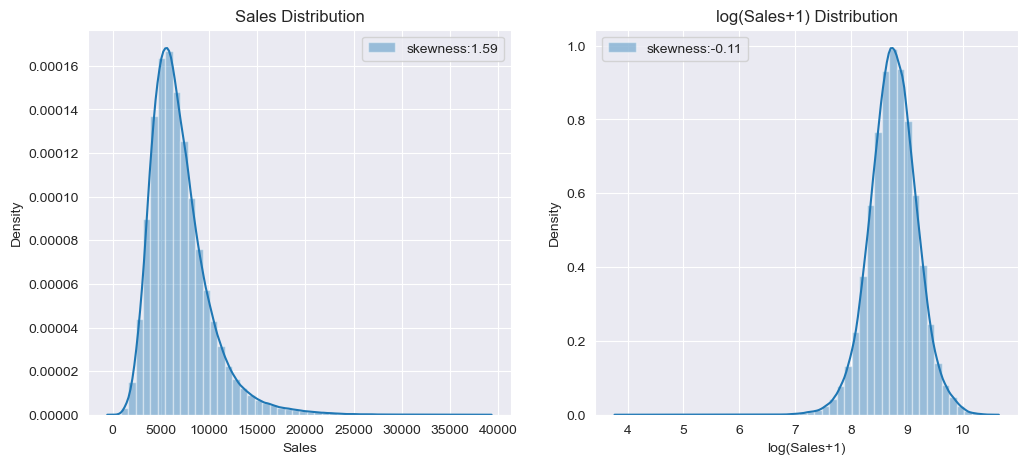

In [21]:
# Dichteverteilung der Verkaufszahlen. Einmal normal und einmal logarithmisch und normalisiert
import seaborn as sns
import matplotlib.pyplot as plt

# check distribution of sales in train set
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
g1 = sns.distplot(train['Sales'],hist = True,label='skewness:{:.2f}'.format(train['Sales'].skew()),ax = ax1)
g1.legend()
g1.set(xlabel = 'Sales', ylabel = 'Density', title = 'Sales Distribution')
g2 = sns.distplot(np.log1p(train['Sales']),hist = True,label='skewness:{:.2f}'.format(np.log1p(train['Sales']).skew()),ax=ax2)
g2.legend()
g2.set(xlabel = 'log(Sales+1)',ylabel = 'Density', title = 'log(Sales+1) Distribution')
plt.show()

In [22]:
# process train and test
# aufbereiten der daten, neue Spalten und manche werden entfernt
def process(data, isTest = False):
    # label encode some features
    mappings = {'0':0, 'a':1, 'b':2, 'c':3, 'd':4}
    # buchstaben zu zahlen
    data.StoreType.replace(mappings, inplace=True)
    data.Assortment.replace(mappings, inplace=True)
    data.StateHoliday.replace(mappings, inplace=True)
    
    # extract some features from date column  
    data['Month'] = data.Date.dt.month
    data['Year'] = data.Date.dt.year
    data['Day'] = data.Date.dt.day
    data['WeekOfYear'] = data.Date.dt.weekofyear
    
    # calculate competiter open time in months
    data['CompetitionOpen'] = 12 * (data.Year - data.CompetitionOpenSinceYear) + \
        (data.Month - data.CompetitionOpenSinceMonth)
    data['CompetitionOpen'] = data['CompetitionOpen'].apply(lambda x: x if x > 0 else 0)
    
    # calculate promo2 open time in months
    data['PromoOpen'] = 12 * (data.Year - data.Promo2SinceYear) + \
        (data.WeekOfYear - data.Promo2SinceWeek) / 4.0
    data['PromoOpen'] = data['PromoOpen'].apply(lambda x: x if x > 0 else 0)
                                                 
    # Indicate whether the month is in promo interval
    month2str = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', \
             7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
    data['month_str'] = data.Month.map(month2str)

    def check(row):
        if isinstance(row['PromoInterval'],str) and row['month_str'] in row['PromoInterval']:
            return 1
        else:
            return 0
        
    data['IsPromoMonth'] =  data.apply(lambda row: check(row),axis=1)    
    
    # select the features we need
    features = ['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'Year', 'Month', 'Day',
       'WeekOfYear', 'CompetitionOpen', 'PromoOpen', 'IsPromoMonth']  
    if not isTest:
        features.append('Sales')
        
    data = data[features]
    return data

train = process(train)
valid = process(valid)
train_total = process(train_total)
x_test = process(test,isTest = True)

C:\Users\Christian Karg\AppData\Local\Temp\ipykernel_23816\855944218.py:15: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data['WeekOfYear'] = data.Date.dt.weekofyear
C:\Users\Christian Karg\AppData\Local\Temp\ipykernel_23816\855944218.py:15: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data['WeekOfYear'] = data.Date.dt.weekofyear
C:\Users\Christian Karg\AppData\Local\Temp\ipykernel_23816\855944218.py:15: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data['WeekOfYear'] = data.Date.dt.weekofyear
C:\Users\Christian Karg\AppData\Local\Temp\ipykernel_23816\855944218.py:15: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data['WeekOfYear'] = data.Date.dt.weekofyear


In [23]:
train.head()

,Store,DayOfWeek,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,...,Promo2SinceWeek,Promo2SinceYear,Year,Month,Day,WeekOfYear,CompetitionOpen,PromoOpen,IsPromoMonth,Sales
284584,314,5,1,0,0,1,1,3560.0,10.0,2001.0,...,31.0,2013.0,2015,6,19,25,164.0,22.50,0,5032
417104,458,5,1,0,0,3,1,3390.0,0.0,0.0,...,0.0,0.0,2015,6,19,25,24186.0,24186.25,0,7362
875290,961,5,1,0,0,4,3,9430.0,0.0,0.0,...,0.0,0.0,2015,6,19,25,24186.0,24186.25,0,7764
119580,132,5,1,0,0,4,3,1040.0,0.0,0.0,...,27.0,2012.0,2015,6,19,25,24186.0,35.50,0,7964
807974,887,5,1,0,0,4,1,19700.0,0.0,0.0,...,37.0,2009.0,2015,6,19,25,24186.0,69.00,0,7776


In [24]:
#Aufteilen in x und y Werte (x-werte daten, y-Werte Verkaufszahlen)
# sort by index
valid.sort_index(inplace = True)
train.sort_index(inplace = True)
train_total.sort_index(inplace = True)

# split x and y
x_train, y_train = train.drop(columns = ['Sales']), np.log1p(train['Sales'])
x_valid, y_valid = valid.drop(columns = ['Sales']), np.log1p(valid['Sales'])
x_train_total, y_train_total = train_total.drop(columns = ['Sales']), np.log1p(train_total['Sales'])

In [25]:
x_train.head().append(x_train.tail())

C:\Users\Christian Karg\AppData\Local\Temp\ipykernel_23816\1672511306.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x_train.head().append(x_train.tail())


,Store,DayOfWeek,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Year,Month,Day,WeekOfYear,CompetitionOpen,PromoOpen,IsPromoMonth
42,1,5,1,0,0,3,1,1270.0,9.0,2008.0,0,0.0,0.0,2015,6,19,25,81.0,24186.25,0
43,1,4,1,0,0,3,1,1270.0,9.0,2008.0,0,0.0,0.0,2015,6,18,25,81.0,24186.25,0
44,1,3,1,0,0,3,1,1270.0,9.0,2008.0,0,0.0,0.0,2015,6,17,25,81.0,24186.25,0
45,1,2,1,0,0,3,1,1270.0,9.0,2008.0,0,0.0,0.0,2015,6,16,25,81.0,24186.25,0
46,1,1,1,0,0,3,1,1270.0,9.0,2008.0,0,0.0,0.0,2015,6,15,25,81.0,24186.25,0
1017202,1115,1,1,0,1,4,3,5350.0,0.0,0.0,1,22.0,2012.0,2013,1,7,2,24157.0,7.00,0
1017204,1115,6,0,0,1,4,3,5350.0,0.0,0.0,1,22.0,2012.0,2013,1,5,1,24157.0,6.75,0
1017205,1115,5,0,0,1,4,3,5350.0,0.0,0.0,1,22.0,2012.0,2013,1,4,1,24157.0,6.75,0
1017206,1115,4,0,0,1,4,3,5350.0,0.0,0.0,1,22.0,2012.0,2013,1,3,1,24157.0,6.75,0
1017207,1115,3,0,0,1,4,3,5350.0,0.0,0.0,1,22.0,2012.0,2013,1,2,1,24157.0,6.75,0


In [26]:
y_train.head().append(y_train.tail())

C:\Users\Christian Karg\AppData\Local\Temp\ipykernel_23816\2868602157.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train.head().append(y_train.tail())


42         8.343554
43         8.443762
44         8.294300
45         8.487352
46         8.615952
1017202    8.840146
1017204    8.470521
1017205    8.420903
1017206    8.365905
1017207    8.215547
Name: Sales, dtype: float64

In [27]:
# define eval metrics
# Mittleres Abweichungsquadrat
def rmspe(y, yhat):
    return np.sqrt(np.mean((yhat/y-1) ** 2))
# expm1 ist umkehr von log1p
def rmspe_xg(yhat, y):
    y = np.expm1(y.get_label())
    yhat = np.expm1(yhat)
    return "rmspe", rmspe(y,yhat)

In [28]:
# try random forest
# wie gut sagt random forest das ganze voraus
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor(n_estimators = 15)
clf.fit(x_train, y_train)
# validation
y_pred = clf.predict(x_valid)
error = rmspe(np.expm1(y_valid), np.expm1(y_pred))
print('RMSPE: {:.4f}'.format(error))

RMSPE: 0.1602


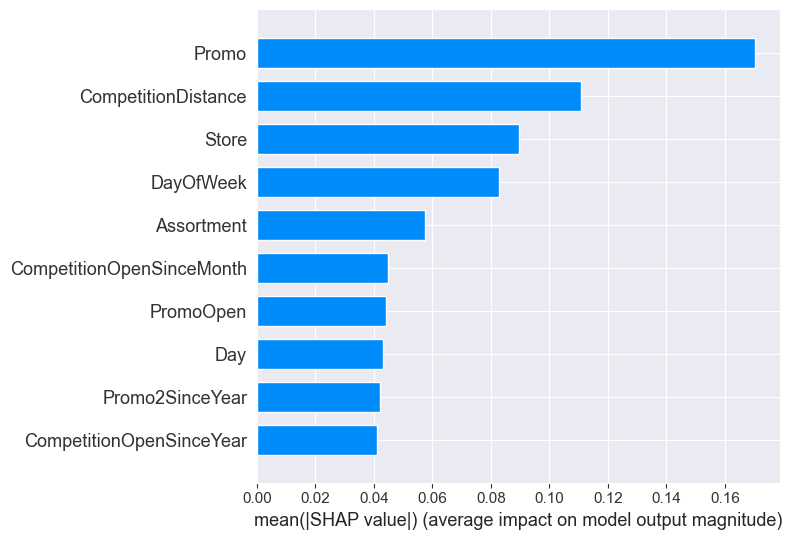

Text(0.5, 1.0, 'Feature Importance')

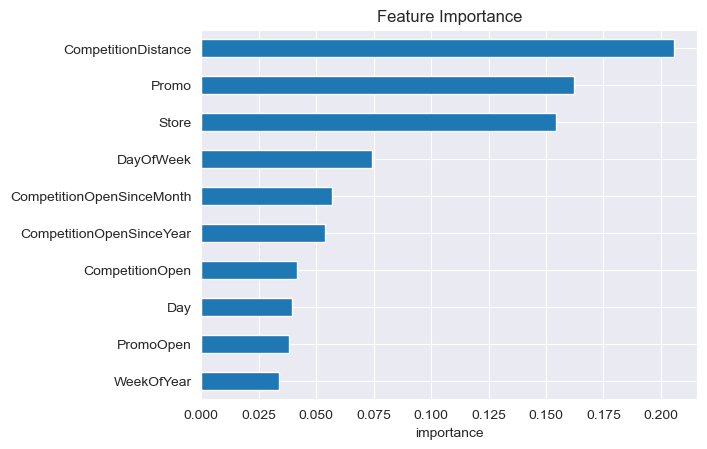

In [29]:
# plot feature importance for random forest model, show top 10 features
# Test Edit für SHAP Methode
import shap
ex = shap.TreeExplainer(clf) # Erstellen des TreeExplainers
shap_values = ex.shap_values(x_train, approximate= True) #Berechnung der APPROXIMIERTEN Shapley Values (wegen Laufzeit)
shap.summary_plot(shap_values, x_train,max_display= 10, title = 'SHAP', plot_type= 'bar') # Plot der Feature Importance mit SHAP


feat_importances = pd.Series(clf.feature_importances_, index=x_train.columns)
feat_importances.nlargest(10).sort_values(ascending = True).plot(kind='barh')
plt.xlabel('importance')
plt.title('Feature Importance')

In [30]:
import xgboost as xgb

params = {"objective": "reg:linear", # for linear regression
          "booster" : "gbtree",   # use tree based models 
          "eta": 0.03,   # learning rate
          "max_depth": 10,    # maximum depth of a tree
          "subsample": 0.9,    # Subsample ratio of the training instances
          "colsample_bytree": 0.7,   # Subsample ratio of columns when constructing each tree
          "silent": 1,   # silent mode
          "seed": 10   # Random number seed
          }
# anzahl trainingsrunden
num_boost_round = 80

dtrain = xgb.DMatrix(x_train, y_train)
dvalid = xgb.DMatrix(x_valid, y_valid)
watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
# train the xgboost model
model = xgb.train(params, dtrain, num_boost_round, evals=watchlist, \
  early_stopping_rounds= 100, feval=rmspe_xg, verbose_eval=True)

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[14:20:58] WARNING: c:\windows\temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[14:20:58] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-rmse:8.02087	train-rmspe:0.99981	eval-rmse:8.02744	eval-rmspe:0.99981
[1]	train-rmse:7.78076	train-rmspe:0.99971	eval-rmse:7.78738	eval-rmspe:0.99971
[2]	train-rmse:7.54783	train-rmspe:0.99959	eval-rmse:7.55454	eval-rmspe:0.99960
[3]	train-rmse:7.32197	train-rmspe:0.99944	eval-rmse:7.32858	eval-rmspe:0.99945
[4]	train-rmse:7.10289	train-rmspe:0.99926	eval-rmse:7

In [31]:
# validation
# dafür werden die outgesorcten teile gebraucht
y_pred = model.predict(xgb.DMatrix(x_valid))
error = rmspe(np.expm1(y_valid), np.expm1(y_pred))
print('RMSPE: {:.4f}'.format(error))


RMSPE: 0.5126


Best weight is 1.02, RMSPE is 0.4365


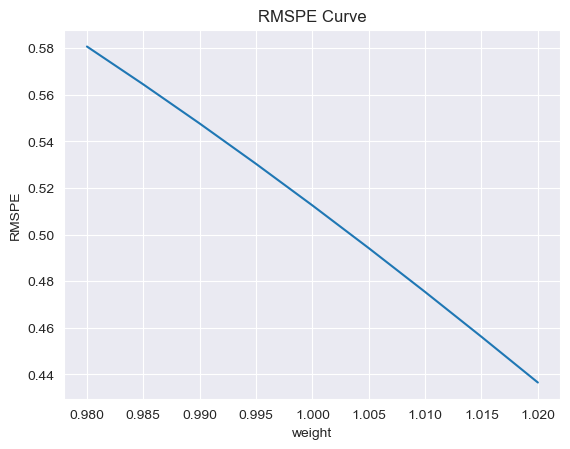

In [32]:
# rmspe correction on the whole
def correction():
    weights = np.arange(0.98, 1.02, 0.005)
    errors = []
    for w in weights:
        error = rmspe(np.expm1(y_valid), np.expm1(y_pred*w))
        errors.append(error)
        
    # make line plot
    plt.plot(weights, errors)
    plt.xlabel('weight')
    plt.ylabel('RMSPE')
    plt.title('RMSPE Curve')
    # print min error
    idx = errors.index(min(errors))
    print('Best weight is {}, RMSPE is {:.4f}'.format(weights[idx], min(errors)))
    
correction()


In [33]:
x_train_total.head().append(x_train_total.tail())

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


,Store,DayOfWeek,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Year,Month,Day,WeekOfYear,CompetitionOpen,PromoOpen,IsPromoMonth
0,1,5,1,0,1,3,1,1270.0,9.0,2008.0,0,0.0,0.0,2015,7,31,31,82.0,24187.75,0
1,1,4,1,0,1,3,1,1270.0,9.0,2008.0,0,0.0,0.0,2015,7,30,31,82.0,24187.75,0
2,1,3,1,0,1,3,1,1270.0,9.0,2008.0,0,0.0,0.0,2015,7,29,31,82.0,24187.75,0
3,1,2,1,0,1,3,1,1270.0,9.0,2008.0,0,0.0,0.0,2015,7,28,31,82.0,24187.75,0
4,1,1,1,0,1,3,1,1270.0,9.0,2008.0,0,0.0,0.0,2015,7,27,31,82.0,24187.75,0
1017202,1115,1,1,0,1,4,3,5350.0,0.0,0.0,1,22.0,2012.0,2013,1,7,2,24157.0,7.00,0
1017204,1115,6,0,0,1,4,3,5350.0,0.0,0.0,1,22.0,2012.0,2013,1,5,1,24157.0,6.75,0
1017205,1115,5,0,0,1,4,3,5350.0,0.0,0.0,1,22.0,2012.0,2013,1,4,1,24157.0,6.75,0
1017206,1115,4,0,0,1,4,3,5350.0,0.0,0.0,1,22.0,2012.0,2013,1,3,1,24157.0,6.75,0
1017207,1115,3,0,0,1,4,3,5350.0,0.0,0.0,1,22.0,2012.0,2013,1,2,1,24157.0,6.75,0


In [34]:
print(x_train_total.shape)
print(y_train_total.shape)

(844338, 20)
(844338,)


In [35]:
# Anwendung des Gelernten auf den Test Datensatz
# jetzt wird der ganze Datensatz verwendet
import xgboost as xgb

dtrain = xgb.DMatrix(x_train_total, y_train_total)
dtest = xgb.DMatrix(x_test)
# specify parameters via map
params = {"objective": "reg:linear", # for linear regression
          "booster" : "gbtree",   # use tree based models 
          "eta": 0.03,   # learning rate
          "max_depth": 10,    # maximum depth of a tree
          "subsample": 0.9,    # Subsample ratio of the training instances
          "colsample_bytree": 0.7,   # Subsample ratio of columns when constructing each tree
          "silent": 1,   # silent mode
          "seed": 10   # Random number seed
          }
num_round = 3000
model = xgb.train(params, dtrain, num_round)
# make prediction
preds = model.predict(dtest)

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[14:21:21] WARNING: c:\windows\temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[14:21:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [60]:
print(np.mean(preds))

8.725359


Kleinerer Testdatensatz

In [36]:
x_test_1 = x_test.loc[(x_test['Store']==1) & (x_test['Year']==2015) & (x_test['Month']==9) & (x_test['Day']==17)]
dtest_1 = xgb.DMatrix(x_test_1)
pred_1 = model.predict(dtest_1)
x_test_1.head()

,Store,DayOfWeek,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Year,Month,Day,WeekOfYear,CompetitionOpen,PromoOpen,IsPromoMonth
0,1,4,1,0,0,3,1,1270.0,9.0,2008.0,0,0.0,0.0,2015,9,17,38,84.0,24189.5,0


Durchschnittliche Anzahl verkauf

In [54]:
mean_sales_log = y_train.mean()
mean_sales = np.expm1(mean_sales_log*0.995)
print(mean_sales)

6084.152660691491


Funktion, welche 0 oder 1 returned, je nachdem, ob postiver Wert oder negativer

In [61]:
def bin(x):
    if x > 0:
        return 1
    else:
        return 0

In [66]:
from alibi.explainers import AnchorTabular


feature_names  = ['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'Year', 'Month', 'Day',
       'WeekOfYear', 'CompetitionOpen', 'PromoOpen', 'IsPromoMonth']
print(type(feature_names))
#print(feature_names)
predictor = lambda x: bin(model.predict(xgb.DMatrix(x))-mean_sales_log)
explainer = AnchorTabular(predictor, feature_names)

<class 'list'>


PredictorCallError: Predictor failed to be called on <class 'numpy.ndarray'> of shape (1, 20) and dtype float32. Check that the parameter `feature_names` is correctly specified.

In [ ]:


ex.fit(dtrain)

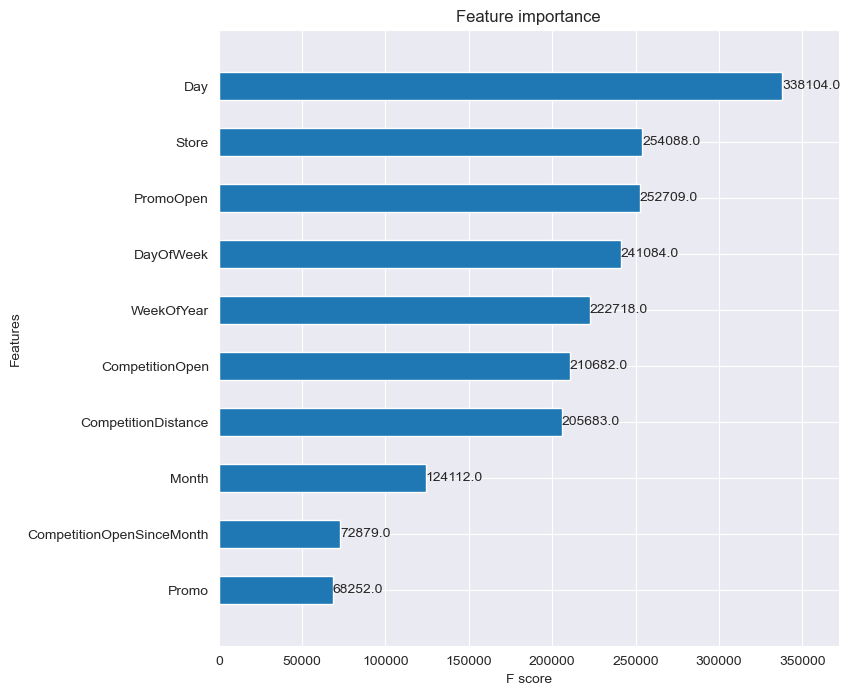

In [50]:
# make submission using best weight
result = pd.DataFrame({"Id": test["Id"],'Sales': np.expm1(preds*0.995)})
result.to_csv("submission_xgb.csv", index=False)

# plot feature importance, show top 10 features
fig, ax = plt.subplots(figsize=(8,8))
xgb.plot_importance(model, max_num_features= 10, height=0.5, ax=ax)
plt.show()

Text(0.5, 1.0, 'Store 10 Predicted Sales Distribution')

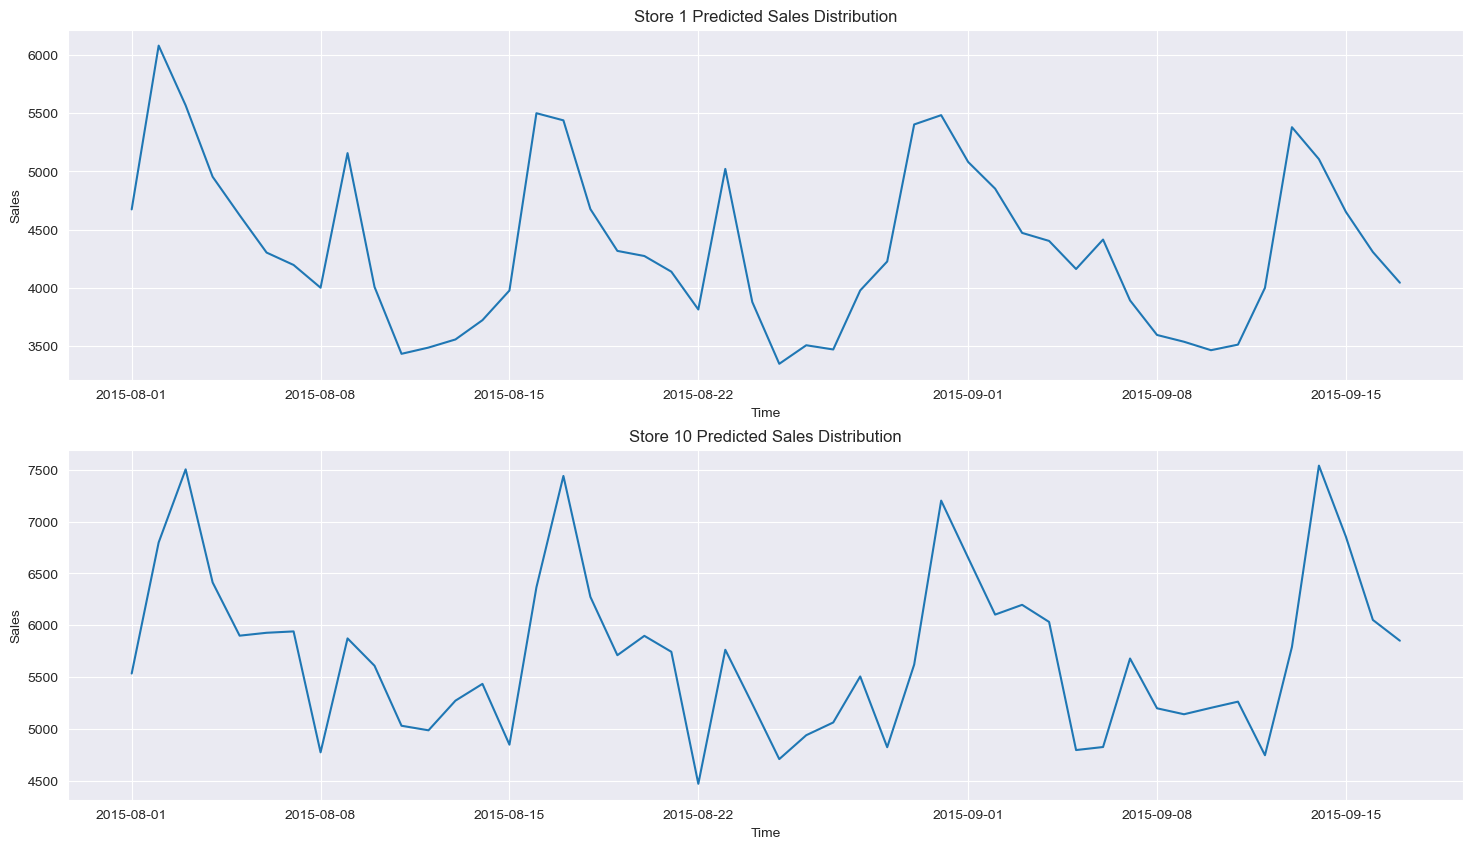

In [51]:
result = result.sort_values(['Id'],ascending = True)
result = pd.merge(result, test, on='Id')
result.to_csv("submission_xgb.csv", index=False)
# draw store 1 and store 10 sales distribution plot
import matplotlib.pyplot as plt
store_1 = result.loc[(result['Store']==1)&(result['Sales']>0), ['Date','Sales']]
store_10 = result.loc[(result['Store']==10)&(result['Sales']>0), ['Date','Sales']]
f = plt.figure(figsize=(18,10))
ax1 = f.add_subplot(211)
ax1.plot(store_1['Date'], store_1['Sales'], '-')
ax1.set_xlabel('Time')
ax1.set_ylabel('Sales')
ax1.set_title('Store 1 Predicted Sales Distribution')

ax2 = f.add_subplot(212)
ax2.plot(store_10['Date'], store_10['Sales'], '-')
ax2.set_xlabel('Time')
ax2.set_ylabel('Sales')
ax2.set_title('Store 10 Predicted Sales Distribution')

Reference:  

1. [XGBoost documentation](http://xgboost.readthedocs.io/en/latest/parameter.html#)  
2. [Model documentation 1st place](http://www.kaggle.com/c/rossmann-store-sales/discussion/18024)
3. [XGBoost Feature Importance](https://www.kaggle.com/cast42/xgboost-in-python-with-rmspe-v2/code)
4. [Rossmann Sales Top1%](https://www.kaggle.com/xwxw2929/rossmann-sales-top1)


    